<H1>Библиотеки</H1>

In [ ]:
import matplotlib.pyplot as plt 
#import numpy as np
import pandas as pd

<H1>Загрузка данных из .CSV</H1>

In [ ]:
colnames = ["id", "system", "systemname", "start", "finish", "color", "desc"]
datatypes={
    'id': 'int64',
    'system': 'string',
    'systemname': 'string',
    'start': 'string',
    'finish' : 'string',
    'color' : 'string',
    'desc' : 'string'
    }

df = pd.read_csv("render_input_rwa.csv", header=None, skiprows=[0], engine='python', sep=';', dtype=datatypes, names= colnames)

dataarr = []
row = 0
max_time = pd.to_timedelta('0:0:0')

for i in df.iterrows():
    temparr = {
        'row' : row,
        'id' : i[1]['id'],
        'system' : i[1]['system'],
        'systemname' : i[1]['systemname'],
        'start' : pd.to_timedelta(i[1]['start']),
        'finish' : pd.to_timedelta(i[1]['finish']),
        'duration' : pd.to_timedelta(i[1]['finish']) - pd.to_timedelta(i[1]['start']),
        'color' : i[1]['color'],
        'desc' : i[1]['desc']
    }
    if max_time < temparr['finish']:
        max_time = temparr['finish']
    row += 1    
    dataarr.append(temparr)

data = pd.DataFrame(dataarr)
data

<H1>Подготовим данные для диаграммы</H1>

In [ ]:

ch = pd.Series(data['duration'], index=data['row'])
ch

<H1>Вспомогательный массив с временем завершения</H1>

In [ ]:
timrange = pd.Series(data['finish'])
timrange

<H1>Параметры диаграммы для проверки</H1>

In [ ]:
print (f'Макс время на диаграмме: {max_time}')

<H1>Отрисуем</H1>

In [ ]:
chart = ch.plot(kind='barh', color=data['color'])
chart.set_xlabel('Длительность')
chart.set_ylabel('Система')

chart

In [ ]:
#https://uproger.com/3-unikalnye-diagrammy-sozdannye-s-pomoshhyu-matplotlib/


import datetime
import matplotlib.pyplot as plt
from matplotlib.dates import datestr2num, DateFormatter, DayLocator
from matplotlib.ticker import AutoMinorLocator
from matplotlib.patches import Patch

def gethours_timedelta (tt : pd.Timedelta):
    hours, remainder = divmod(i.seconds, 3600)
    minutes, seconds = divmod(remainder, 60)
    return round((hours * 60 + minutes)/60, 1)

def gethours_str (tt):
    ts = str(tt)
    hours = int(ts.split(' ')[2].split(':')[0])
    minutes = int(ts.split(' ')[2].split(':')[1])
    return round((hours * 60 + minutes)/60, 0)

# Create dummy date
#tasks = ['Task A', 'Task B', 'Task C', 'Task D', 'Task E', 'Task F', 'Task G', 'Task H', 'Task I', 'Task J']
#start_dates = ['2023-02-25', '2023-03-10', '2023-03-13', '2023-03-23', '2023-04-01', '2023-04-05', '2023-04-12', '2023-04-20', '2023-04-24', '2023-05-02']
#end_dates = ['2023-03-03', '2023-03-17', '2023-03-22', '2023-03-30', '2023-04-07', '2023-04-18', '2023-04-23', '2023-04-25', '2023-05-03', '2023-05-07']
tasks = [ddd for ddd in data['system']]
start_dates = [gethours_str(h) for h in data['start']]
end_dates = [gethours_str(h) for h in data['finish']]
durations = [int(gethours_str(h)) for h in data['duration']]

print (tasks)
print (start_dates)
print (end_dates)
print (durations)

temp = pd.DataFrame({'system' : tasks, 'duration' : durations})
temp.plot.barh (y='duration', x='system')



# Setup the dates and calculate durations
#start_dates = [datestr2num(d) for d in start_dates]
#end_dates = [datestr2num(d) for d in end_dates]

#durations = [(end - start) for start, end in zip(start_dates, end_dates)]


fig, ax = plt.subplots(figsize=(15, 8), facecolor='#25253c')

ax.set_facecolor('#25253c')

# Create colours for each task based on categories
colors = ['#7a5195', '#ef5675', '#ffa600'] 
task_colors = [colors[0]] * 3 + [colors[1]] * 4 + [colors[2]] * 3

# Display the bars
ax.barh(y=tasks, width=durations, left=start_dates, height=0.8) #, color=task_colors)

ax.invert_yaxis()

# Setup the x axis labels
ax.set_xlim(start_dates[0], end_dates[-1])

date_form = DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_formatter(date_form)

ax.xaxis.set_major_locator(DayLocator(interval=10))
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.tick_params(axis='x', which='minor', length=2, color='white', labelsize=6)

ax.get_yaxis().set_visible(False)

# Control the colour of the grid for major and minor lines
ax.grid(True, axis='x', linestyle='-', color='#FFFFFF', alpha=0.2, which='major')
ax.grid(True, axis='x', linestyle='-', color='#FFFFFF', alpha=0.05, which='minor')
ax.set_axisbelow(True)

# Add labels for each task. For padding, we can use an f-string and add some extra space
for i, task in enumerate(tasks):
    ax.text(start_dates[i], i, f'  {task}', ha='left', va='center', color='white', fontsize=12, fontweight='bold')

# Add the current date line
today = datetime.datetime.now().strftime("%Y-%m-%d")
today_num = datestr2num(today)
ax.axvline(today_num, color='red', alpha=0.8)

# Style ticks, labels and colours
ax.tick_params(axis='both', colors='white')

ax.set_xlabel('Date', color='white', fontsize=12)
ax.set_title('Project Schedule', color='white', fontsize=14)

# Hide spines so only bottom is visible
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


plt.show()

In [ ]:
#https://uproger.com/3-unikalnye-diagrammy-sozdannye-s-pomoshhyu-matplotlib/


def gethours_timedelta (tt : pd.Timedelta):
    hours, remainder = divmod(i.seconds, 3600)
    minutes, seconds = divmod(remainder, 60)
    return round((hours * 60 + minutes)/60, 1)

def gethours_str (tt):
    ts = str(tt)
    hours = int(ts.split(' ')[2].split(':')[0])
    minutes = int(ts.split(' ')[2].split(':')[1])
    return round((hours * 60 + minutes)/60, 0)

tasks = [ddd for ddd in data['desc']]
start_dates = [gethours_str(h) for h in data['start']]
end_dates = [gethours_str(h) for h in data['finish']]
durations = [int(gethours_str(h)) for h in data['duration']]
colors = [ccc for ccc in data['color']]

print (tasks)
print (start_dates) 
print (end_dates)
print (durations)
print (colors)
temp = pd.DataFrame({'Этап' : tasks, 'Длительность' : durations})

temp.plot.barh (y='Длительность', x='Этап', left=start_dates, color=colors)

In [ ]:
#https://uproger.com/3-unikalnye-diagrammy-sozdannye-s-pomoshhyu-matplotlib/
df = pd.read_excel("render_input_project.xlsx")

dataarr = []
row = 0

for i in df.iterrows():
    temparr = {
        'row' : row,
        'id' : i[1]['id'],
        'system' : i[1]['system'],
        'systemname' : i[1]['systemname'],
        'start' : i[1]['start'],
        'finish' : i[1]['finish'],
        'color' : i[1]['color'],
        'desc' : i[1]['desc']
    }

    row += 1    
    dataarr.append(temparr)

data = df #pd.DataFrame(dataarr)
print (data)

def gethours_str (tt):
    ts = str(tt)
    hours = int(ts.split(' ')[-1].split(':')[0])
    minutes = int(ts.split(' ')[-1].split(':')[1])
    return round((hours * 60 + minutes)/60, 1)

tasks = [ddd for ddd in data['systemname']]
start_dates = [gethours_str(h) for h in data['start']]
end_dates = [gethours_str(h) for h in data['finish']]
durations = [fintim - startim for fintim,startim in zip(end_dates, start_dates)]
colors = [ccc for ccc in data['color']]

print (tasks)
print (start_dates) 
print (end_dates)
print (durations)
print (colors)

temp2 = pd.DataFrame({'Этап' : data['systemname'], 'Длительность' : durations})
temp2.plot.barh (y='Длительность', x='Этап', left=start_dates, color=colors)


<H1> РАБОЧИЙ ВАРИАНТ </H1>

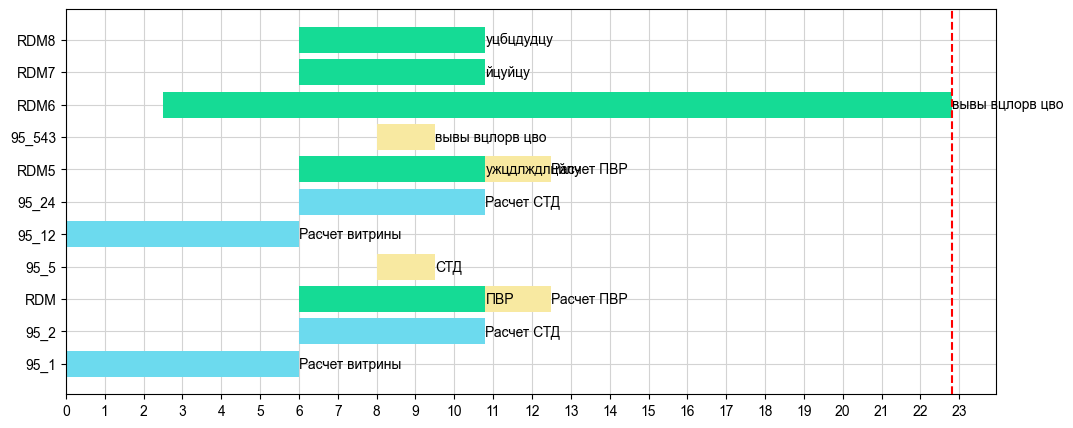

In [35]:
#https://uproger.com/3-unikalnye-diagrammy-sozdannye-s-pomoshhyu-matplotlib/

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
from datetime import datetime

data = pd.read_excel("render_big.xlsx")

# Перевод HH:MM в десятичную дробь
def gethours (tt : datetime):
    return round((tt.hour * 60 + tt.minute)/60, 1)

# Время начала (начало прямоугольника)
start_times = [gethours(h) for h in data['start']]

# Длительность (ширина прямоугольника)
durations = [gethours(fintim)- gethours(startim) for fintim,startim in zip(data['finish'], data['start'])]

# Макс. время (для отметок на оси X)
maxfinish = max(gethours(ff) for ff in (data['finish']))

# Шрифт и размер графика
plt.rcParams["font.family"] = "Arial"
fig, ax = plt.subplots(1, figsize=(12,4+int(len(data)/8)))

# Рисование диаграммы
bars = ax.barh (data['system'], durations, left=start_times,color=data['color'], align='center')
#plt.tight_layout()

# Сетка
plt.grid(color='lightgray')
ax.set_axisbelow(True)

# Отметки на оси X
ax.set_xticks([i for i in range(int(maxfinish) + 2)])

# Подписи
ax.bar_label(bars, label_type='edge', labels=data['desc'], zorder=2)

# Вертикальная черта красным пунктиром
ax.axvline(maxfinish, color="red", linestyle="--", zorder=3)
